In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
# Import data
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRMZC4UMZYUmIeLLOAcrYDaamTQlAVA_DdsN7FAw397w9ByLtYkFqeVTLwLQvLr7gWsifXgUpdSNyUv/pub?output=csv'
df = pd.read_csv(filename)

# Prepare the Data

# Choose the features
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']

# Encode 'Sex' column
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})

# Remove rows where age is nan from the dataset
df = df.dropna(subset=['Age'])


# Create feautures and target vector
X = df[feature_cols]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [12]:
# Create and Fit a Pipeline
# It’s a good idea to scale data before using a logistic regression model, so we will create a pipeline with a scaler and a logistic regression
# classifier. All of our features are now numeric and there are no missing values, so we don’t need any other preprocessing.
# We will also make a prediction using the test set and compare our model’s predictions to the true labels for each row.


# make a pipeline to scale the data and fit the model
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

# train the model on the data
logreg_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = logreg_pipe.predict(X_test)


# actual values what an algorithm should have predicted
print('True Values')
y_test.values

True Values


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [16]:
# Evaluate the Model
from sklearn.metrics import confusion_matrix

# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(y_test.values, predictions)

cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,87,16
1,17,59


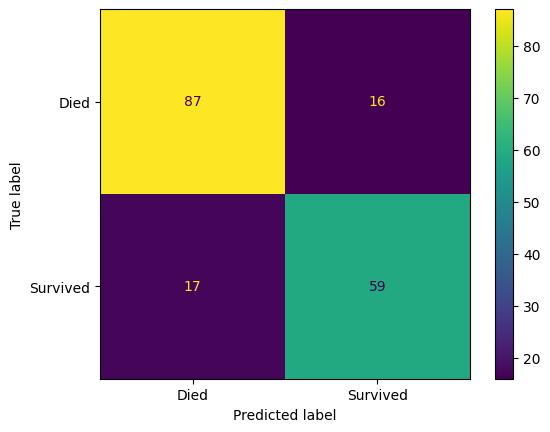

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
labels = ['Died', 'Survived']

ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=labels)

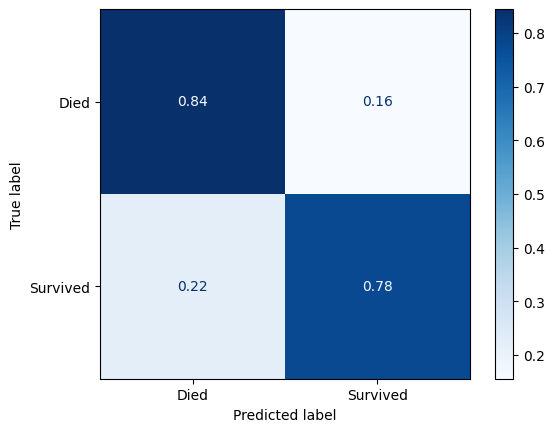

In [20]:
# You can also normalize values in the cells to show either the percentages of the true values that the model predicted correctly or
# incorrectly or the percentages of the predicted values that were correct or incorrect with the normalize argument. You can normalize
# along the true axis by setting normalize=’true’ or the predicted axis with normalize=’pred’.

ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=labels, cmap='Blues', normalize='true')